In [1]:
import numpy as np
import pandas as pd
import nltk
import seaborn as sns

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
tweets = pd.read_csv('/kaggle/input/nlp-getting-started/sample_submission.csv', encoding = 'latin-1')
tweets.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [3]:
train_data=pd.read_csv("/kaggle/input/nlp-getting-started/train.csv",encoding='latin-1')
test_data=pd.read_csv("/kaggle/input/nlp-getting-started/test.csv",encoding='latin-1')

In [4]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
train_data.shape,test_data.shape

((7613, 5), (3263, 4))

In [6]:
train_text=train_data.text
test_text=test_data.text

In [7]:
y=train_data.target

In [8]:
import re

In [9]:
def clean_text(text):
    text=text.lower()
    text=re.sub('#','',text)
    text=re.sub('[^a-zA-Z ]','',text)
    return text

In [10]:
train_text.head()

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

In [11]:
import spacy

# Load the spaCy English language model
nlp = spacy.load("en_core_web_sm")

train_sequence = []

for i in range(len(train_text)):
    doc = nlp(train_text.iloc[i])
    words = [token.lemma_ for token in doc if not token.is_stop]
    sent = ' '.join(words)
    train_sequence.append(sent)

In [12]:
len(train_sequence)

7613

In [13]:
train_sequence[0]

'deed Reason # earthquake ALLAH forgive'

In [14]:
test_sequence = []

for i in range(len(test_text)):
    doc = nlp(test_text.iloc[i])
    words = [token.lemma_ for token in doc if not token.is_stop]
    sent = ' '.join(words)
    test_sequence.append(sent)

In [15]:
len(test_sequence)

3263

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [17]:
tfidf=TfidfVectorizer(min_df=2,ngram_range=(1,3),max_features=10000)


In [18]:
vectorized_train=tfidf.fit_transform(train_sequence)


In [19]:
vectorized_train.shape


(7613, 10000)

In [20]:
vectorized_test=tfidf.transform(test_sequence)


In [21]:
vectorized_test.shape


(3263, 10000)

In [22]:
vectorized_train=vectorized_train.toarray()
vectorized_test=vectorized_test.toarray()

In [23]:
vectorized_train[0]


array([0., 0., 0., ..., 0., 0., 0.])

In [24]:
from sklearn.linear_model import LogisticRegression


In [25]:
from sklearn.model_selection import train_test_split


In [26]:
X_train, X_test, y_train, y_test = train_test_split(vectorized_train,y,test_size=0.2,random_state=0)


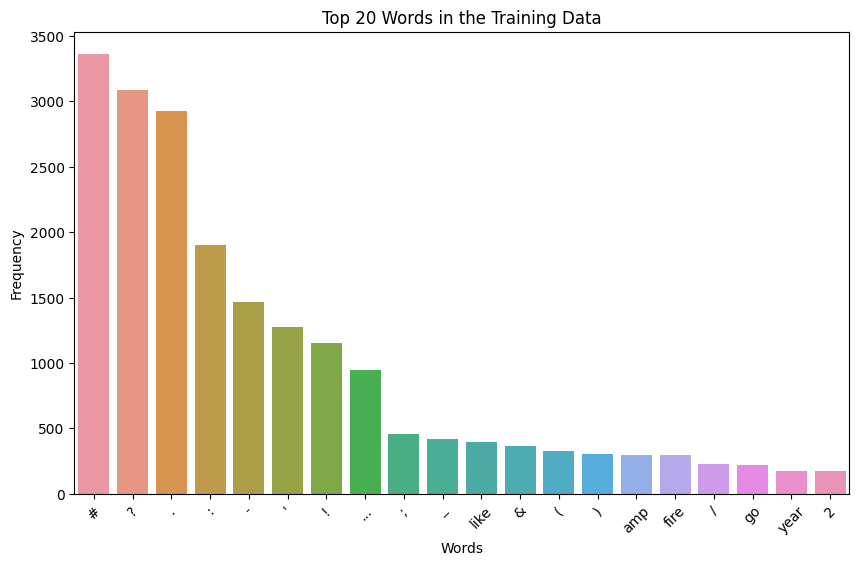

In [27]:
# Word Frequency Analysis
from collections import Counter
import matplotlib.pyplot as plt

# Tokenize the training text
tokenized_words = [word for sent in train_sequence for word in sent.split()]

# Calculate word frequencies
word_freq = Counter(tokenized_words)

# Plot the top N words
top_n = 20
most_common_words = word_freq.most_common(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x=[word[0] for word in most_common_words], y=[word[1] for word in most_common_words])
plt.title(f"Top {top_n} Words in the Training Data")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


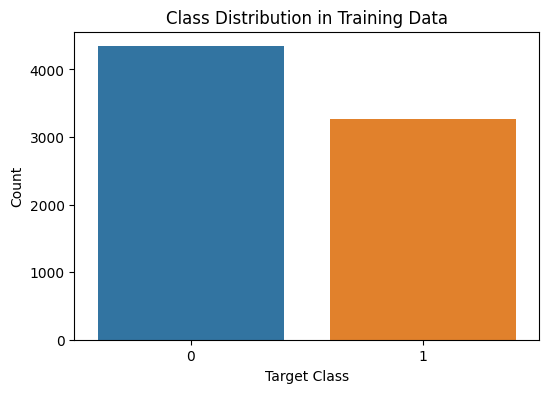

Class Distribution Percentage:
target
0    0.57034
1    0.42966
Name: proportion, dtype: float64


In [28]:
# Class Distribution Analysis
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=train_data)
plt.title("Class Distribution in Training Data")
plt.xlabel("Target Class")
plt.ylabel("Count")
plt.show()

# Calculate the class distribution percentage
class_distribution = train_data['target'].value_counts(normalize=True)
print("Class Distribution Percentage:")
print(class_distribution)

In [29]:
classifier=LogisticRegression(C=2)


In [30]:
classifier.fit(X_train,y_train)


LogisticRegression(C=2)

In [31]:
classifier.score(X_test,y_test)


0.8174655285620486

In [32]:
y_pred=classifier.predict(vectorized_test)


In [33]:
id=test_data.id


In [34]:
output_df=pd.DataFrame({'id':id,"target":y_pred})


In [35]:
output_df.to_csv('submission.csv',index=False)


In [36]:
test_data.iloc[0]


id                                           0
keyword                                    NaN
location                                   NaN
text        Just happened a terrible car crash
Name: 0, dtype: object

In [37]:
import pickle


In [38]:
pickle.dump(classifier,open('disClassifier.pkl','wb'))


In [39]:
pickle.dump(tfidf,open('tfidf.pkl','wb'))
